# GED Training Survey Analysis

### Importing Libraries

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

#### Data Cleaning

In [197]:
df = pd.read_excel("ged_training_survey.xlsx", index_col='GED ID Number')

In [198]:
df.head()

,Timestamp,Batch,What specific changes or improvements would you like to see in the LMS platform?,"On a scale of 1-5, with 1 being very inconvenient and 5 being very convenient, how would you rate the overall convenience of learning on the LMS?",Please explain your rating. What aspects of the LMS did you find particularly convenient or inconvenient?,What difficulty did you face at online learning?,What did you like the most about the training program?,Which subjects do you find most enjoyable?,Did you join the mentor session?,Can you describe your experience when a mentor provided valuable guidance or advice?,...,"How would you describe your improvement in applying knowledge from the GED subjects in real-life situations, after the program?","What specific changes or additions would you recommend to improve the GED program's training sessions, based on your experience and the skills you gained or still feel you need to improve?(Select up to 3 options)",Which aspects of the GED program do you believe contributed the most to your improvement? (Select up to 3 options),How satisfied are you with the overall GED program?,How would you rate this training helpful in preparing you for the GED exam?,Do you have any other comments or feedback about your experience with the program?,Are there any additional topics you would like to see during training sessions?,Is there anything else you would like to share about your experience regarding the program?(Describe),Would you recommend this program to others?,@
GED ID Number,,,,,,,,,,,,,,,,,,,,,
GED2024007,2024-10-19 10:50:23.262,GED First Batch,Have to scroll a bit to find a specific date. ...,4,NaN,noisy environment,"Mentor Session, Exam Session","Math, Social Studies, RLA, Science",Yes,My mentor helped me brainstorm what universiti...,...,Can apply knowledge more often,"More practice problems in each subject, Additi...","Availability of practice exams and quizzes, Fe...",5,5,I immediately took the GED exam after the prog...,"For RLA, I want more reading exercises. Specif...",Extremely good! I learnt a lot from the teache...,Yes,NaN
GED202402_66,2024-10-19 11:36:48.070,GED Second Batch,"Not really, Everything is great",5,It is very satisfying.,"Internet, noisy environment","Mentor Session, Weekly practice sessions","Math, Social Studies",No,All teachers are very good at teaching and ver...,...,Confident in applying knowledge,"More practice problems in each subject, More i...","Quality of teaching and instruction, Study mat...",5,5,I'm starting to feel more and more confident f...,More wider informations in social studies and ...,Thanks for the program,Yes,NaN
GED202402_93,2024-10-19 14:23:48.420,GED Second Batch,-,4,"Sometimes,it is inconvient because of poor con...",Internet,"LMS, Weekly practice sessions, Exam Session",Math,No,"""Have a commitment "" is a guidance for me to c...",...,"Some improvement, but still challenging","Additional study materials or resources, Longe...","Quality of teaching and instruction, Availabil...",3,4,Its program is very helpful to us.,-,-,Yes,NaN
GED202402_104,2024-10-19 22:21:50.346,GED Second Batch,I got more practices and wide knowledges for t...,5,I love using Moodle. Also how the teachers tau...,"Electricity, Internet, device, I feel really s...","LMS, Exam Session","Social Studies, RLA",No,NaN,...,Very confident in applying knowledge,"More interactive activities or group work, Acc...","Quality of teaching and instruction, Availabil...",4,5,Math+Science ကိုဆက်တိုက်သင်ရတာကတော့ နည်းနည်းအခ...,Not really,-,Yes,NaN
GED202402_81,2024-10-20 17:04:46.871,GED Second Batch,Since the LMS platform provides assignments wi...,4,The LMS displays assignments on the dashboard ...,"Electricity, Internet, noisy environment","Mentor Session, Weekly practice sessions","Math, Social Studies",No,Valuing others' rights and always moving forwa...,...,Confident in applying knowledge,"More interactive activities or group work, Acc...","Quality of teaching and instruction, Availabi

#### Dropping and Renaming Column Names

<p>There is unnecessary columns('@') in dataframe, so we need to drop this.</p>

In [200]:
df.drop('@', axis=1, inplace=True)

<p>Since column names are too long, we rename them to shorter and meaningful ones.</p>

In [201]:
column_map = {
    'Timestamp': 'Timestamp',
    'Batch': 'Batch',
    'What specific changes or improvements would you like to see in the LMS platform?  ': 'LMS_Improvements',
    ' On a scale of 1-5, with 1 being very inconvenient and 5 being very convenient, how would you rate the overall convenience of learning on the LMS?  ': 'LMS_Convenience_Rating',
    ' Please explain your rating. What aspects of the LMS did you find particularly convenient or inconvenient?  ': 'LMS_Convenience_Explained',
    'What difficulty did you face at online learning?': 'Online_Learning_Difficulty',
    'What did you like the most about the training program?': 'Training_Likes_Category',
    'Which subjects do you find most enjoyable?': 'Fav_Subjects',
    'Did you join the mentor session?': 'Joined_Mentor_Session',
    'Can you describe your experience when a mentor provided valuable guidance or advice?': 'Mentor_Experience',
    'What areas could be improved in our GED program? Please check all that apply:': 'GED_Improvements',
    'How effective were the teaching methods used in the math sessions?  ': 'Math_Teaching_Effectiveness',
    'Do you feel that a 1.5 hour, 2 times weekly session is sufficient to cover the math learning material effectively?   ': 'Math_Time_Sufficient',
    'How confident do you feel in your math skills after completing the program?  ': 'Math_Confidence_After',
    ' Do you find that the amount of homework and assignments given for math is reasonable, considering the other subjects you\'re studying?  ': 'Math_Homework_Reasonable',
    'How would you rate the teacher\'s ability to provide individual attention and support during the math class? ': 'Math_Teacher_Attention',
    'How satisfied are you with the math content covered in the program?   ': 'Math_Content_Satisfaction',
    'How effective were the teaching methods used in the social studies sessions? ': 'SS_Teaching_Effectiveness',
    'Do you feel that a 1.5 hour, 2 times weekly session is sufficient to cover the social studies learning material effectively?   ': 'SS_Time_Sufficient',
    ' How confident do you feel in your social studies skills after completing the program?': 'SS_Confidence_After',
    'Do you find that the amount of homework and assignments given for social studies is reasonable, considering the other subjects you\'re studying?  ': 'SS_Homework_Reasonable',
    'How would you rate the teacher\'s ability to provide individual attention and support during the social studies class? ': 'SS_Teacher_Attention',
    'How satisfied are you with the social studies content covered in the program? ': 'SS_Content_Satisfaction',
    'How effective were the teaching methods used in the RLA sessions?   ': 'RLA_Teaching_Effectiveness',
    'Do you feel that a 1.5 hour, 2 times weekly session is sufficient to cover the RLA learning material effectively?  ': 'RLA_Time_Sufficient',
    ' How confident do you feel in your RLA skills after completing the program? ': 'RLA_Confidence_After',
    'Do you find that the amount of homework and assignments given for RLA is reasonable, considering the other subjects you\'re studying?  ': 'RLA_Homework_Reasonable',
    'How would you rate the teacher\'s ability to provide individual attention and support during the RLA class? ': 'RLA_Teacher_Attention',
    'How satisfied are you with the RLA content covered in the program? ': 'RLA_Content_Satisfaction',
    ' How effective were the teaching methods used in the science sessions? ': 'Science_Teaching_Effectiveness',
    'Do you feel that a 1.5 hour, 2 times weekly session is sufficient to cover the science learning material effectively?   ': 'Science_Time_Sufficient',
    'How confident do you feel in your science skills after completing the program?': 'Science_Confidence_After',
    ' Do you find that the amount of homework and assignments given for science is reasonable, considering the other subjects you\'re studying?   ': 'Science_Homework_Reasonable',
    'How would you rate the teacher\'s ability to provide individual attention and support during the science class? ': 'Science_Teacher_Attention',
    'How satisfied are you with the science content covered in the program?': 'Science_Content_Satisfaction',
    'On a scale of 1-5, how would you rate your confidence in the following subjects before joining the GED program? ( 1 means no confidence and 5 means very confident )  [Math]': 'Pre_GED_Math_Confidence',
    'On a scale of 1-5, how would you rate your confidence in the following subjects before joining the GED program? ( 1 means no confidence and 5 means very confident )  [RLA]': 'Pre_GED_RLA_Confidence',
    'On a scale of 1-5, how would you rate your confidence in the following subjects before joining the GED program? ( 1 means no confidence and 5 means very confident )  [Science]': 'Pre_GED_Science_Confidence',
    'On a scale of 1-5, how would you rate your confidence in the following subjects before joining the GED program? ( 1 means no confidence and 5 means very confident )  [Social Studies]': 'Pre_GED_SS_Confidence',
    'On a scale of 1-5, how would you rate your confidence in the following subjects after joining the GED program? (1 means no improvement and 5 means significant improvement)  [Math]': 'Post_GED_Math_Confidence',
    'On a scale of 1-5, how would you rate your confidence in the following subjects after joining the GED program? (1 means no improvement and 5 means significant improvement)  [RLA]': 'Post_GED_RLA_Confidence',
    'On a scale of 1-5, how would you rate your confidence in the following subjects after joining the GED program? (1 means no improvement and 5 means significant improvement)  [Science]': 'Post_GED_Science_Confidence',
    'On a scale of 1-5, how would you rate your confidence in the following subjects after joining the GED program? (1 means no improvement and 5 means significant improvement)  [Social Studies]': 'Post_GED_SS_Confidence',
    'How well did the program meet your expectations compared to what you anticipated before starting the GED course?': 'Program_Expectations_Met',
    'Mathematics: The GED program has significantly improved my ability to solve complex mathematical problems, such as algebra and geometry.(1 = Strongly Disagree, 5 = Strongly Agree)': 'Math_Skills_Improved',
    'Science: The GED program has greatly improved my understanding of scientific concepts and experiments.(1 = Strongly Disagree, 5 = Strongly Agree)\n': 'Science_Skills_Improved',
    'Social Studies: The GED program has significantly improved my understanding of history, government, and social topics. (1 = Strongly Disagree, 5 = Strongly Agree)\n': 'SS_Skills_Improved',
    'RLA:  The GED program has significantly improved my reading comprehension and analysis of written texts.  (1 = Strongly Disagree, 5 = Strongly Agree)\n': 'RLA_Skills_Improved',
    'Which subject area(s) do you feel you improved the most in after the training?': 'Top_Improved_Subjects',
    'How would you describe your confidence in applying knowledge from the GED subjects in real-life situations, before the program?': 'Pre_Real_Life_Confidence',
    'How would you describe your improvement in applying knowledge from the GED subjects in real-life situations, after the program?': 'Post_Real_Life_Confidence',
    'What specific changes or additions would you recommend to improve the GED program\'s training sessions, based on your experience and the skills you gained or still feel you need to improve?(Select up to 3 options)': 'GED_Improvement_Recommendations',
    'Which aspects of the GED program do you believe contributed the most to your improvement? (Select up to 3 options)': 'Top_GED_Contributors',
    'How satisfied are you with the overall GED program?': 'Overall_GED_Satisfaction',
    'How would you rate this training  helpful in preparing you for the GED exam? ': 'GED_Exam_Preparation_Rating',
    'Do you have any other comments or feedback about your experience with the program?': 'Additional_Comments',
    'Are there any additional topics you would like to see during training sessions? ': 'Requested_Topics',
    'Is there anything else you would like to share about your experience regarding the program?(Describe)': 'Experiences_Shares',
    'Would you recommend this program to others?': 'Recommend_Program'
}


In [202]:
df_modified = df.rename(columns=column_map)

In [203]:
df_modified.head()

,Timestamp,Batch,LMS_Improvements,LMS_Convenience_Rating,LMS_Convenience_Explained,Online_Learning_Difficulty,Training_Likes_Category,Fav_Subjects,Joined_Mentor_Session,Mentor_Experience,...,Pre_Real_Life_Confidence,Post_Real_Life_Confidence,GED_Improvement_Recommendations,Top_GED_Contributors,Overall_GED_Satisfaction,GED_Exam_Preparation_Rating,Additional_Comments,Requested_Topics,Experiences_Shares,Recommend_Program
GED ID Number,,,,,,,,,,,,,,,,,,,,,
GED2024007,2024-10-19 10:50:23.262,GED First Batch,Have to scroll a bit to find a specific date. ...,4,NaN,noisy environment,"Mentor Session, Exam Session","Math, Social Studies, RLA, Science",Yes,My mentor helped me brainstorm what universiti...,...,Was fairly confident in applying knowledge,Can apply knowledge more often,"More practice problems in each subject, Additi...","Availability of practice exams and quizzes, Fe...",5,5,I immediately took the GED exam after the prog...,"For RLA, I want more reading exercises. Specif...",Extremely good! I learnt a lot from the teache...,Yes
GED202402_66,2024-10-19 11:36:48.070,GED Second Batch,"Not really, Everything is great",5,It is very satisfying.,"Internet, noisy environment","Mentor Session, Weekly practice sessions","Math, Social Studies",No,All teachers are very good at teaching and ver...,...,Could apply knowledge sometimes,Confident in applying knowledge,"More practice problems in each subject, More i...","Quality of teaching and instruction, Study mat...",5,5,I'm starting to feel more and more confident f...,More wider informations in social studies and ...,Thanks for the program,Yes
GED202402_93,2024-10-19 14:23:48.420,GED Second Batch,-,4,"Sometimes,it is inconvient because of poor con...",Internet,"LMS, Weekly practice sessions, Exam Session",Math,No,"""Have a commitment "" is a guidance for me to c...",...,Struggled with applying knowledge,"Some improvement, but still challenging","Additional study materials or resources, Longe...","Quality of teaching and instruction, Availabil...",3,4,Its program is very helpful to us.,-,-,Yes
GED202402_104,2024-10-19 22:21:50.346,GED Second Batch,I got more practices and wide knowledges for t...,5,I love using Moodle. Also how the teachers tau...,"Electricity, Internet, device, I feel really s...","LMS, Exam Session","Social Studies, RLA",No,NaN,...,Was very confident in applying knowledge,Very confident in applying knowledge,"More interactive activities or group work, Acc...","Quality of teaching and instruction, Availabil...",4,5,Math+Science ကိုဆက်တိုက်သင်ရတာကတော့ နည်းနည်းအခ...,Not really,-,Yes
GED202402_81,2024-10-20 17:04:46.871,GED Second Batch,Since the LMS platform provides assignments wi...,4,The LMS displays assignments on the dashboard ...,"Electricity, Internet, noisy environment","Mentor Session, Weekly practice sessions","Math, Social Studies",No,Valuing others' rights and always moving forwa...,...,Was fairly confident in applying knowledge,Confident in applying knowledge,"More interactive activities or group work, Acc...","Quality of teaching and instruction, Availabil...",4,5,"In Science and Maths, the teacher regularly ch...",It would be beneficial to have sessions that e...,During times when I felt lost and didn’t know ...,Yes


In [204]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, GED2024007 to GED202402_58
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Timestamp                        28 non-null     datetime64[ns]
 1   Batch                            28 non-null     object        
 2   LMS_Improvements                 28 non-null     object        
 3   LMS_Convenience_Rating           28 non-null     int64         
 4   LMS_Convenience_Explained        24 non-null     object        
 5   Online_Learning_Difficulty       28 non-null     object        
 6   Training_Likes_Category          28 non-null     object        
 7   Fav_Subjects                     28 non-null     object        
 8   Joined_Mentor_Session            28 non-null     object        
 9   Mentor_Experience                20 non-null     object        
 10  GED_Improvements                 28 non-null     o

#### Handling Null Values

<p>There are null values in some columns, we replace with appropriate ones.</p>

In [205]:
df_modified['LMS_Convenience_Explained'].fillna('Not Specified', inplace=True)
df_modified['Mentor_Experience'].fillna('Not Specified', inplace=True)

In [206]:
# Maths
math_effectiveness_mode = df_modified['Math_Teaching_Effectiveness'].mode()[0]
df_modified['Math_Teaching_Effectiveness'].fillna(math_effectiveness_mode, inplace=True)

math_confidence_mode = df_modified['Math_Confidence_After'].mode()[0]
df_modified['Math_Confidence_After'].fillna(math_confidence_mode, inplace=True)

math_attention_mode = df_modified['Math_Teacher_Attention'].mode()[0]
df_modified['Math_Teacher_Attention'].fillna(math_attention_mode, inplace=True)

math_satisfy_mode = df_modified['Math_Content_Satisfaction'].mode()[0]
df_modified['Math_Content_Satisfaction'].fillna(math_satisfy_mode, inplace=True)

# RLA
rla_attention_mode = df_modified['RLA_Teacher_Attention'].mode()[0]
df_modified['RLA_Teacher_Attention'].fillna(rla_attention_mode, inplace=True)

# Social Science
science_effectiveness_mode = df_modified['Science_Teaching_Effectiveness'].mode()[0]
df_modified['Science_Teaching_Effectiveness'].fillna(science_effectiveness_mode, inplace=True)

science_confidence_mode = df_modified['Science_Confidence_After'].mode()[0]
df_modified['Science_Confidence_After'].fillna(science_confidence_mode, inplace=True)

science_attention_mode = df_modified['Science_Teacher_Attention'].mode()[0]
df_modified['Science_Teacher_Attention'].fillna(science_attention_mode, inplace=True)

science_satisfy_mode = df_modified['Science_Content_Satisfaction'].mode()[0]
df_modified['Science_Content_Satisfaction'].fillna(science_satisfy_mode, inplace=True)

# Post GED Math
post_ged_math_mode = df_modified['Post_GED_Math_Confidence'].mode()[0]
df_modified['Post_GED_Math_Confidence'].fillna(post_ged_math_mode, inplace=True)

# Post GED Social Science
post_ged_science_mode = df_modified['Post_GED_Science_Confidence'].mode()[0]
df_modified['Post_GED_Science_Confidence'].fillna(post_ged_science_mode, inplace=True)



In [207]:
df_modified['Joined_Mentor_Session'] = df_modified['Joined_Mentor_Session'].astype('category')

df_modified['Math_Teaching_Effectiveness'] = df_modified['Math_Teaching_Effectiveness'].astype('int64')
df_modified['Math_Confidence_After'] = df_modified['Math_Confidence_After'].astype('int64')
df_modified['Math_Teacher_Attention'] = df_modified['Math_Teacher_Attention'].astype('int64')
df_modified['Math_Content_Satisfaction'] = df_modified['Math_Content_Satisfaction'].astype('int64')

df_modified['RLA_Teacher_Attention'] = df_modified['RLA_Teacher_Attention'].astype('int64')

df_modified['Science_Teaching_Effectiveness'] = df_modified['Science_Teaching_Effectiveness'].astype('int64')
df_modified['Science_Confidence_After'] = df_modified['Science_Confidence_After'].astype('int64')
df_modified['Science_Teacher_Attention'] = df_modified['Science_Teacher_Attention'].astype('int64')
df_modified['Science_Content_Satisfaction'] = df_modified['Science_Content_Satisfaction'].astype('int64')

df_modified['Post_GED_Math_Confidence'] = df_modified['Post_GED_Math_Confidence'].astype('int64')

df_modified['Post_GED_Science_Confidence'] = df_modified['Post_GED_Science_Confidence'].astype('int64')

df_modified['Program_Expectations_Met'] = df_modified['Program_Expectations_Met'].astype('category')

#### Export the cleaning dataset

In [208]:
df_modified.to_excel('cleaning_survey.xlsx')

In [209]:
df_modified.head()

,Timestamp,Batch,LMS_Improvements,LMS_Convenience_Rating,LMS_Convenience_Explained,Online_Learning_Difficulty,Training_Likes_Category,Fav_Subjects,Joined_Mentor_Session,Mentor_Experience,...,Pre_Real_Life_Confidence,Post_Real_Life_Confidence,GED_Improvement_Recommendations,Top_GED_Contributors,Overall_GED_Satisfaction,GED_Exam_Preparation_Rating,Additional_Comments,Requested_Topics,Experiences_Shares,Recommend_Program
GED ID Number,,,,,,,,,,,,,,,,,,,,,
GED2024007,2024-10-19 10:50:23.262,GED First Batch,Have to scroll a bit to find a specific date. ...,4,Not Specified,noisy environment,"Mentor Session, Exam Session","Math, Social Studies, RLA, Science",Yes,My mentor helped me brainstorm what universiti...,...,Was fairly confident in applying knowledge,Can apply knowledge more often,"More practice problems in each subject, Additi...","Availability of practice exams and quizzes, Fe...",5,5,I immediately took the GED exam after the prog...,"For RLA, I want more reading exercises. Specif...",Extremely good! I learnt a lot from the teache...,Yes
GED202402_66,2024-10-19 11:36:48.070,GED Second Batch,"Not really, Everything is great",5,It is very satisfying.,"Internet, noisy environment","Mentor Session, Weekly practice sessions","Math, Social Studies",No,All teachers are very good at teaching and ver...,...,Could apply knowledge sometimes,Confident in applying knowledge,"More practice problems in each subject, More i...","Quality of teaching and instruction, Study mat...",5,5,I'm starting to feel more and more confident f...,More wider informations in social studies and ...,Thanks for the program,Yes
GED202402_93,2024-10-19 14:23:48.420,GED Second Batch,-,4,"Sometimes,it is inconvient because of poor con...",Internet,"LMS, Weekly practice sessions, Exam Session",Math,No,"""Have a commitment "" is a guidance for me to c...",...,Struggled with applying knowledge,"Some improvement, but still challenging","Additional study materials or resources, Longe...","Quality of teaching and instruction, Availabil...",3,4,Its program is very helpful to us.,-,-,Yes
GED202402_104,2024-10-19 22:21:50.346,GED Second Batch,I got more practices and wide knowledges for t...,5,I love using Moodle. Also how the teachers tau...,"Electricity, Internet, device, I feel really s...","LMS, Exam Session","Social Studies, RLA",No,Not Specified,...,Was very confident in applying knowledge,Very confident in applying knowledge,"More interactive activities or group work, Acc...","Quality of teaching and instruction, Availabil...",4,5,Math+Science ကိုဆက်တိုက်သင်ရတာကတော့ နည်းနည်းအခ...,Not really,-,Yes
GED202402_81,2024-10-20 17:04:46.871,GED Second Batch,Since the LMS platform provides assignments wi...,4,The LMS displays assignments on the dashboard ...,"Electricity, Internet, noisy environment","Mentor Session, Weekly practice sessions","Math, Social Studies",No,Valuing others' rights and always moving forwa...,...,Was fairly confident in applying knowledge,Confident in applying knowledge,"More interactive activities or group work, Acc...","Quality of teaching and instruction, Availabil...",4,5,"In Science and Maths, the teacher regularly ch...",It would be beneficial to have sessions that e...,During times when I felt lost and didn’t know ...,Yes


### Analyzing The Dataset

#### 1) Number of survey responses for each batch

In [210]:
df_modified['Batch'].value_counts()

Batch
GED Second Batch    23
GED First Batch      5
Name: count, dtype: int64

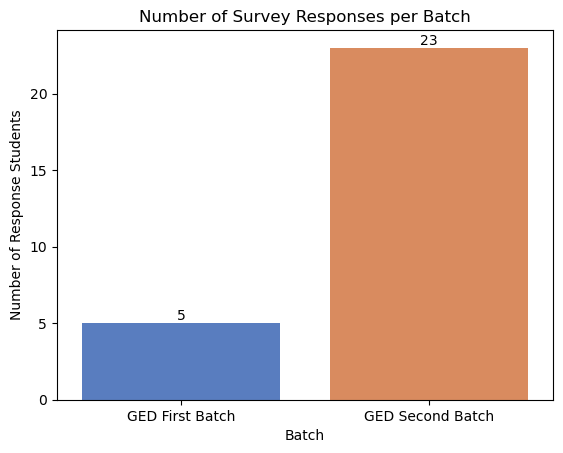

In [211]:
ax = sns.countplot(data=df_modified, x='Batch', palette="muted")

ax.bar_label(ax.containers[0])

plt.title('Number of Survey Responses per Batch')
plt.ylabel('Number of Response Students')
plt.show()

#### 2) User Convenience Rating for LMS Usage

Text(0, 0.5, 'Number of Students Response')

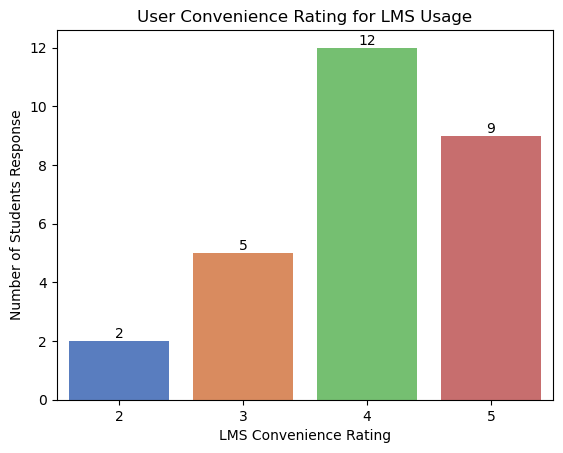

In [212]:
ax = sns.countplot(data=df_modified, x='LMS_Convenience_Rating', palette="muted")

plt.bar_label(ax.containers[0])
plt.title("User Convenience Rating for LMS Usage")
plt.xlabel('LMS Convenience Rating')
plt.ylabel('Number of Students Response')

#### 3) Analyzing Online Learning Difficulites

In [213]:
df_modified['Online_Learning_Difficulty_List'] = df_modified['Online_Learning_Difficulty'].str.split(',')
df_modified_explode = df_modified.explode('Online_Learning_Difficulty_List')
df_modified_explode['Online_Learning_Difficulty_List'] = df_modified_explode['Online_Learning_Difficulty_List'].str.strip()

In [214]:
df_modified_explode['Online_Learning_Difficulty_List'].value_counts()

Online_Learning_Difficulty_List
Internet                                                                                                                                                                                                                25
Electricity                                                                                                                                                                                                             20
device                                                                                                                                                                                                                   9
noisy environment                                                                                                                                                                                                        8
I feel really sorry that I had a lot of personal issues in September and October. In those m

In [215]:
main_difficulties = df_modified_explode['Online_Learning_Difficulty_List'].value_counts()[:4].index.to_list()

df_modified_explode['Online_Learning_Difficulty_List'] = df_modified_explode['Online_Learning_Difficulty_List'].apply(
    lambda x: x.capitalize() if x in main_difficulties else 'Other Difficulities'
)

In [216]:
df_modified_explode['Online_Learning_Difficulty_List'].value_counts()

Online_Learning_Difficulty_List
Internet               25
Electricity            20
Device                  9
Noisy environment       8
Other Difficulities     5
Name: count, dtype: int64

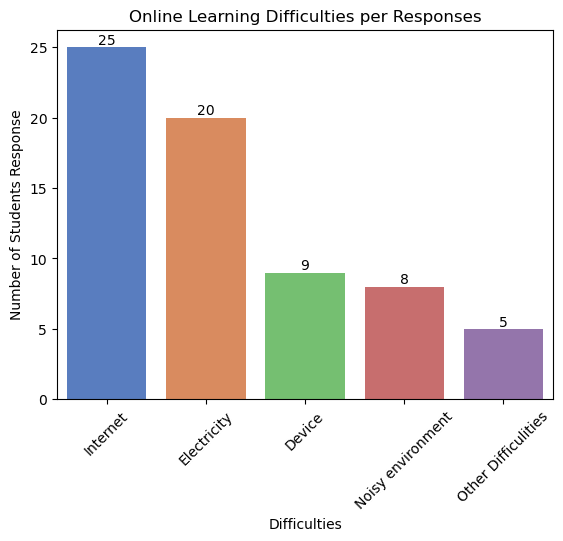

In [217]:
order = df_modified_explode['Online_Learning_Difficulty_List'].value_counts().index
ax = sns.countplot(data=df_modified_explode, x='Online_Learning_Difficulty_List', palette='muted', order=order)

plt.bar_label(ax.containers[0])
plt.title("Online Learning Difficulties per Responses")
plt.xlabel("Difficulties")
plt.ylabel('Number of Students Response')
plt.xticks(rotation=45)

plt.show()

#### 4) Analyzing Students' Preferred Aspects of the Training Program

In [218]:
def split_category(new_col, old_col):
    df_modified[new_col] = df_modified[old_col].str.split(',')
    df_modified_explode = df_modified.explode(new_col)
    df_modified_explode[new_col] = df_modified_explode[new_col].str.strip()
    return df_modified_explode

def group_other_categories(df, col, cat_list):
    df[col] = df[col].apply(
    lambda x: x.capitalize() if x in cat_list else 'Other Categories'
    )
    return df

In [219]:
df_modified_explode = split_category('Training_Likes_Category_List', 'Training_Likes_Category')

main_likes_category = df_modified_explode['Training_Likes_Category_List'].value_counts().index.to_list()[:4]

df_modified_explode = group_other_categories(df_modified_explode, 'Training_Likes_Category_List', main_likes_category)

df_modified_explode['Training_Likes_Category_List'].value_counts()

Training_Likes_Category_List
Weekly practice sessions    17
Lms                         16
Exam session                13
Mentor session              11
Other Categories             3
Name: count, dtype: int64

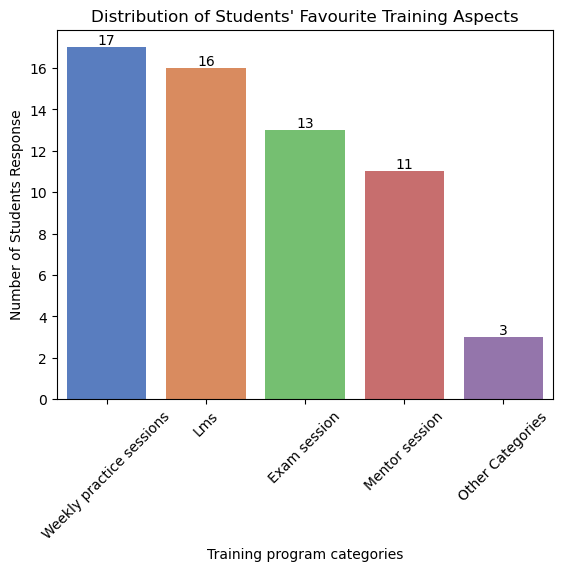

In [220]:
order = df_modified_explode['Training_Likes_Category_List'].value_counts().index

ax = sns.countplot(data=df_modified_explode, x='Training_Likes_Category_List', palette='muted', order=order)

plt.bar_label(ax.containers[0])
plt.title("Distribution of Students' Favourite Training Aspects")
plt.xlabel("Training program categories")
plt.ylabel('Number of Students Response')
plt.xticks(rotation=45)
plt.show()

#### 5) Analyzing Students' Most Enjoyable Subjects

In [222]:
df_modified_explode = split_category('Fav_Subjects_List', 'Fav_Subjects')

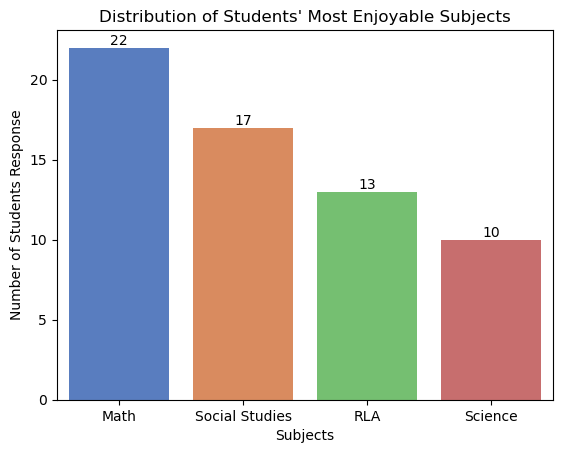

In [226]:
order = df_modified_explode['Fav_Subjects_List'].value_counts().index

ax = sns.countplot(data=df_modified_explode, x='Fav_Subjects_List', palette='muted', order=order)

plt.bar_label(ax.containers[0])
plt.title("Distribution of Students' Most Enjoyable Subjects")
plt.xlabel("Subjects")
plt.ylabel('Number of Students Response')
plt.show()

#### 5) Analyzing Teaching Effectiveness on Each Subject

fig, ax = 